<a href="https://colab.research.google.com/github/notice4/google-colab-study/blob/main/regression_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[['Experience Years']].values
y = df['Salary'].values
model.fit(X, y)
print(f'K: {model.coef_}, bias: {model.intercept_}')

K: [9523.65050742], bias: 25673.01576053028


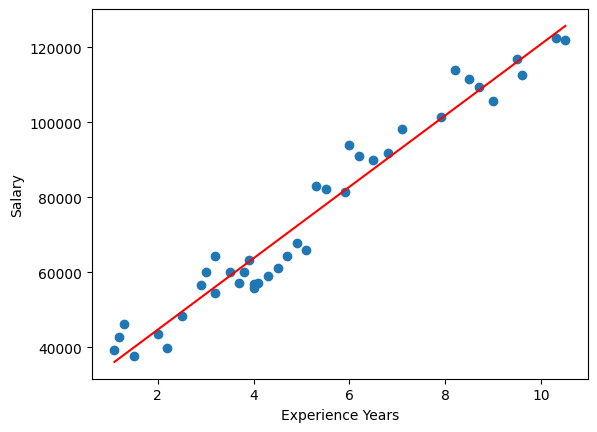

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Experience Years'], df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.plot(df['Experience Years'], model.predict(X), color='red')
plt.show()

In [ ]:
data = pd.read_csv('/content/train.csv')
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
data = data.dropna(subset=['y'])
X = data[['x']].values
y = data['y'].values
model.fit(X, y)
print(f'coef: {model.coef_}, bias: {model.intercept_}')

coef: [0.04618277], bias: 47.400466270549664


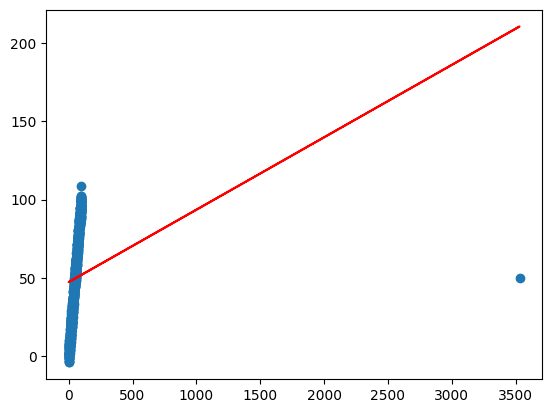

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'])
plt.plot(data['x'], model.predict(X), color='red')

In [1]:
import numpy as np